# Compass Re-Analysis

This notebook walks through use of my code to analyze the ProPublica analysis of COMPAS recidivism risk scores.<br>
-Eric Saund<br>
 February, 2020

In [1]:
import compasAnalysis as ca

setting model type to: logr


c:\python36x64\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\python36x64\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


The ProPublic analysis document explains that they reduce the raw data down to two data sets, one of size 7,214, and one of 6,172.  All of the models and plots of this analysis return equivalent results regardless of data set.

Get the full 7,214 data set from the file, 'compas-scores-two-years.csv'.<br>The apply filters to get down to the 6,172 data set.

In [2]:
ddict_list = ca.loadDataReturnDDictList()

loading data from: data\compas-scores-two-years.csv


In [3]:
len(ddict_list)

7214

In [4]:
ddict_list2 = ca.applyFilters(ddict_list)

In [5]:
len(ddict_list2)

6172

In [6]:
ca.computeChargeDescMap(ddict_list)

setting gl_charge_index_desc_map


In [7]:
ca.computeAgeFeatureMap()

Plot COMPAS predictions for the 6,172 data set as a stacked bar graph. Overplot recid_ratio.

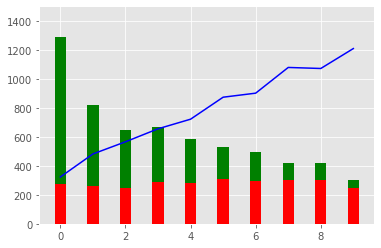

In [8]:
ca.plotRecidByDecile(ddict_list2, 'blue', 'both', 1500)

Print the confusion matrix for the 6,172 data set.
(This printout is not included in the paper)

In [9]:
ca.buildConfusionMatrix(ddict_list2)

count: 6172
[2345, 1018]
[1076, 1733]
FPR: 0.30270591733571217
FNR: 0.38305446778212887
TNR: 0.6972940826642878
TPR = recall: 0.6169455322178711
PPV = precision: 0.6299527444565612
f1: 0.6233812949640288
recidivism ratio: 0.4551198963058976


[[2345, 1018], [1076, 1733]]

Print the confusion matrix for all 7,214 records. (This confusion matrix is included in the slide deck but not in the paper)

In [10]:
ca.buildConfusionMatrix(ddict_list)

count: 7214
[2681, 1282]
[1216, 2035]
FPR: 0.32349230381024474
FNR: 0.3740387573054445
TNR: 0.6765076961897553
TPR = recall: 0.6259612426945556
PPV = precision: 0.6135061802833887
f1: 0.6196711327649209
recidivism ratio: 0.45065151095092876


[[2681, 1282], [1216, 2035]]

Show the ROC Curve for the COMPAS predictions.

In [11]:
roc = ca.buildROCCurve(ddict_list)

AUC:0.7021662544019724


ProPublica reports COMPAS predictive accuracy of decile scores as .66 using a different method with a different data file called cox-parsed.csv.  I cannot explain why they arrive at a different result.  For some reason they chose not to compute AUC directly from the decile scores and recidivism values drawn from the files they use to report the confusion matrix.

AUC: 0.7021662544019724


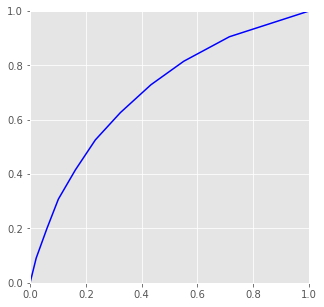

In [12]:
ca.plotROC(roc)

Isolate African-American and Caucasian data records (both data sets).

In [13]:
ddict_list_aa = ca.filterDdict(ddict_list, [('race', '==', 'African-American')])

In [14]:
ddict_list_cau = ca.filterDdict(ddict_list, [('race', '==', 'Caucasian')])

In [15]:
ddict_list2_aa = ca.filterDdict(ddict_list2, [('race', '==', 'African-American')])

In [16]:
ddict_list2_cau = ca.filterDdict(ddict_list2, [('race', '==', 'Caucasian')])

Plot COMPAS predictions for African-American and Caucasian data records as stacked bar graphs.<br>Overplot recid_ratios.

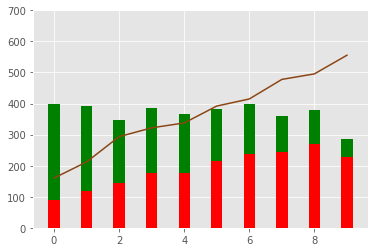

In [17]:
ca.plotRecidByDecile(ddict_list_aa, 'saddlebrown', 'both', 700)

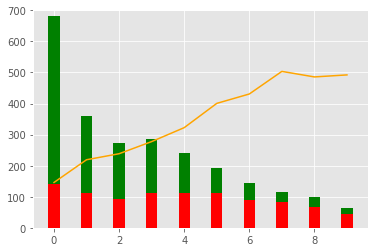

In [18]:
ca.plotRecidByDecile(ddict_list_cau, 'orange', 'both', 700)

Print confusion matrices for African-American and Caucasian data records.

In [19]:
ca.buildConfusionMatrix(ddict_list_aa)

count: 3696
[990, 805]
[532, 1369]
FPR: 0.44846796657381616
FNR: 0.27985270910047344
TNR: 0.5515320334261838
TPR = recall: 0.7201472908995266
PPV = precision: 0.6297148114075437
f1: 0.6719018404907975
recidivism ratio: 0.5143398268398268


[[990, 805], [532, 1369]]

In [20]:
ca.buildConfusionMatrix(ddict_list_cau)

count: 2454
[1139, 349]
[461, 505]
FPR: 0.23454301075268819
FNR: 0.4772256728778468
TNR: 0.7654569892473119
TPR = recall: 0.5227743271221532
PPV = precision: 0.5913348946135831
f1: 0.5549450549450549
recidivism ratio: 0.39364303178484106


[[1139, 349], [461, 505]]

Use the arguments to plotRecidByDecile to get just the recid ratios.<br>Use your favorite image editor to overlay the plots. I used ScanScribe, of course.

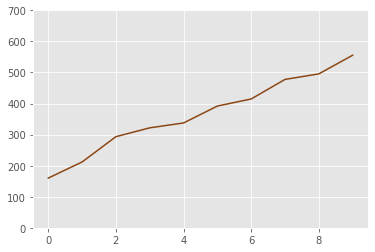

In [21]:
ca.plotRecidByDecile(ddict_list_aa, 'saddlebrown', 'ratio', 700)

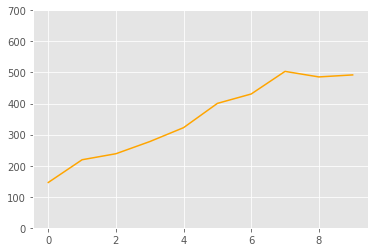

In [22]:
ca.plotRecidByDecile(ddict_list_cau, 'orange', 'ratio', 700)

# Insight From Imaginary Data

We gain insight into how distributions of scores leads to the properties of confusion matrices by examining synthetic data.<br>
The race argument is never actually used but is included as a marker for the characteristics of the population being synthesized.  These are typically designed to be idealized versions of the crufty real data.<br>Generate and plot synthetic data uniformly distributed over decile, with target recid.
This material is not used in the current version of the paper.  
This was part of the development work that led to the Confusion Matrix Dashboard that does all of this interactively in javascript.

In [23]:
ddict_uniform_aa = ca.generateUniformDecileSamples(1000, 'African-American', .51)

In [24]:
ddict_uniform_cau = ca.generateUniformDecileSamples(1000, 'Caucasian', .39)

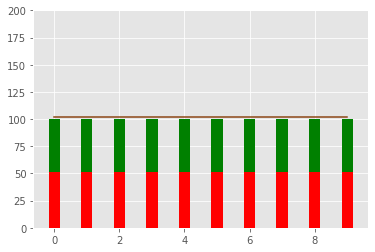

In [25]:
ca.plotRecidByDecile(ddict_uniform_aa, 'saddlebrown', 'both', 200)

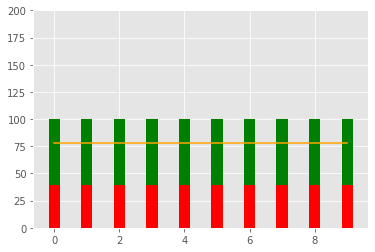

In [26]:
ca.plotRecidByDecile(ddict_uniform_cau, 'orange', 'both', 200)

Generate and plot synthetic data with consistent prediction quality and the same overall recid rate for imaginary 'Synthesized African-American' and 'Synthesized Caucasian' populations of size 1000 each.  The recid rate per decile is the same, reflecting consistent prediction quality of the imaginary prediction algorithm for these data sets. The AA population is uniformly distributed across deciles.

In [27]:
ddict_unilinear_aa = ca.generateUniformDecileSamplesLinearPrediction(1000, 'African-American', .5, .2)

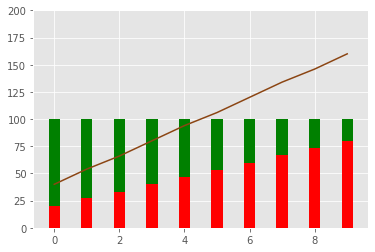

In [28]:
ca.plotRecidByDecile(ddict_unilinear_aa, 'saddlebrown', 'both', 200)

In [29]:
ca.buildConfusionMatrix(ddict_unilinear_aa)

count: 1000
[280, 220]
[120, 380]
FPR: 0.44
FNR: 0.24
TNR: 0.56
TPR = recall: 0.76
PPV = precision: 0.6333333333333333
f1: 0.6909090909090909
recidivism ratio: 0.5


[[280, 220], [120, 380]]

The Cau population declines per decile.  In order for recid ratio to be consistent, the recidivising counts arc downward.

frac_recid_at_decile 0 : 0.2
decile_i: 0 n_at_decile: 190 n_sum: 190 n_recid_at_decile: 38 n_norecid_at_decile: 152 sum: 38
frac_recid_at_decile 1 : 0.26666666666666666
decile_i: 1 n_at_decile: 170 n_sum: 360 n_recid_at_decile: 45 n_norecid_at_decile: 125 sum: 83
frac_recid_at_decile 2 : 0.33333333333333337
decile_i: 2 n_at_decile: 150 n_sum: 510 n_recid_at_decile: 50 n_norecid_at_decile: 100 sum: 133
frac_recid_at_decile 3 : 0.4
decile_i: 3 n_at_decile: 130 n_sum: 640 n_recid_at_decile: 52 n_norecid_at_decile: 78 sum: 185
frac_recid_at_decile 4 : 0.4666666666666667
decile_i: 4 n_at_decile: 110 n_sum: 750 n_recid_at_decile: 51 n_norecid_at_decile: 59 sum: 236
frac_recid_at_decile 5 : 0.5333333333333333
decile_i: 5 n_at_decile: 90 n_sum: 840 n_recid_at_decile: 48 n_norecid_at_decile: 42 sum: 284
frac_recid_at_decile 6 : 0.6
decile_i: 6 n_at_decile: 70 n_sum: 910 n_recid_at_decile: 42 n_norecid_at_decile: 28 sum: 326
frac_recid_at_decile 7 : 0.6666666666666667
decile_i: 7 n_at_decile: 50

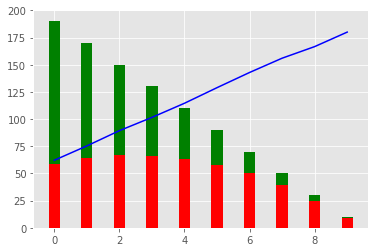

In [30]:
ca.iterateGenerateDecliningDecileSamplesLinearPredictionNewton(1000, 'Caucasian', .5, .2, 1.9)

# Independent Predictive Algorithms

Train and test a Logistic Regression model for the 6,172 data set.  Similar results obtain for the 7,214 data set.<br>
Results are put into global variables in the ca module.

In [31]:
ca.runTrainTestFull(ddict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
AUC: 0.7464678282827086
choosing score_threshold: 0.493 for optimal mcc score: 0.3783261196635663
count: 6172
[2541, 822]
[1071, 1738]
FPR: 0.24442462087421946
FNR: 0.38127447490210037
TNR: 0.7555753791257805
TPR = recall: 0.6187255250978996
PPV = precision: 0.67890625
f1: 0.6474203762339356
mcc: 0.3783261196635663
recidivism ratio: 0.4551198963058976


Plot prediction score distribution as stacked bars as with the COMPAS model.<br>This is not as informative as the line plot below.

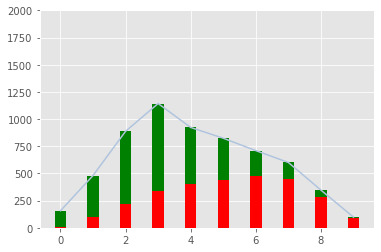

In [32]:
ca.plotPredictionScoresAsStackedDecileBars(ca.gl_last_y, ca.gl_last_preds, None, 2000)

Plot prediction score distributions for true recid (red) and true norecid(green) as lines.

[0, 0, 0, 0.0, 153.1914893617021, 244.89795918367346, 295.10869565217394, 335.3846153846154, 415.0845253576073, 547.3972602739726, 645.4680534918276, 785.4077253218884, 842.9752066115702, 916.3636363636364, 987.4015748031496, 1107.6923076923078, 1200.0, 0, 0, 0]


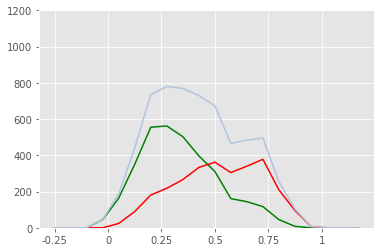

In [33]:
ca.plotPredictionScores(ca.gl_last_y, ca.gl_last_preds, None, 1200)

Plot the ROC Curve (Receiver Operating Characteristic) to see the True Positive Rate/False Positive Rate tradeoff.

AUC: 0.7464678282827086


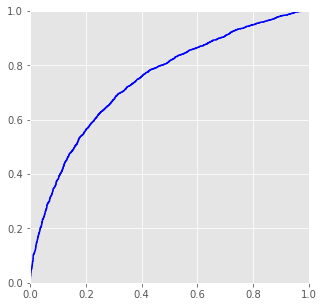

In [34]:
ca.plotROC(ca.gl_last_roc)

Plot and print confusion matrices for the logistic regression model, broken out by African-American and Caucasian subpopulations.<br>Choose the threshold of .493 because that's what was chosen by mcc for the model trained on all data.

In [35]:
ca.runRaceComparisonForModel(ddict_list2, ca.gl_last_model, .493)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']

Caucasian
AUC: 0.7263229570875872
count: 2103
[1025, 256]
[407, 415]
FPR: 0.19984387197501952
FNR: 0.4951338199513382
TNR: 0.8001561280249805
TPR = recall: 0.5048661800486618
PPV = precision: 0.6184798807749627
f1: 0.5559276624246483
mcc: 0.31930763827974906
recidivism ratio: 0.3908701854493581

African-American
AUC: 0.743773347214081
count: 3175
[1041, 473]
[501, 1160]
FPR: 0.31241743725231175
FNR: 0.3016255267910897
TNR: 0.6875825627476883
TPR = recall: 0.6983744732089103
PPV = precision: 0.7103490508266993
f1: 0.7043108682452944
mcc: 0.3857015969950244
recidivism ratio: 0.5231496062992126


Plot the distributions for African-American and Caucasian subpopulations.

[0, 0, 0, 0.0, 41.1764705882353, 171.22302158273382, 193.97590361445782, 207.2, 251.14503816793894, 300.78125, 396.7914438502674, 487.6666666666667, 498.75, 546.4387464387464, 585.9550561797753, 668.1818181818182, 700.0, 0, 0, 0]


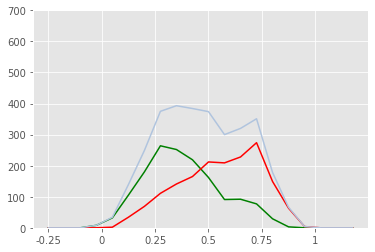

In [36]:
ca.plotPredictionScores(ca.gl_last_y_aa, ca.gl_last_preds_aa, None, ymax = 700)

[0, 0, 0, 0.0, 98.34710743801654, 129.62962962962962, 182.9787234042553, 189.1891891891892, 235.8974358974359, 350.0, 341.6267942583732, 379.16666666666663, 485.9504132231405, 520.183486238532, 531.4814814814815, 606.6666666666667, 700.0, 0, 0, 0]


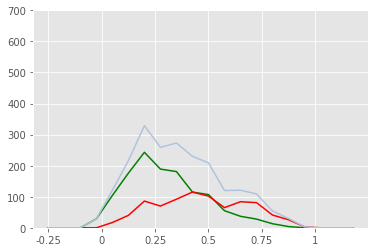

In [37]:
ca.plotPredictionScores(ca.gl_last_y_cau, ca.gl_last_preds_cau, None, ymax = 700)

Overplot the recid ratios with the distributions.  The ratio lines are not perfectly straight, but are pretty much in agreement between the AA and Cau subpopulations.

[0, 0, 0, 0.0, 41.1764705882353, 171.22302158273382, 193.97590361445782, 207.2, 251.14503816793894, 300.78125, 396.7914438502674, 487.6666666666667, 498.75, 546.4387464387464, 585.9550561797753, 668.1818181818182, 700.0, 0, 0, 0]


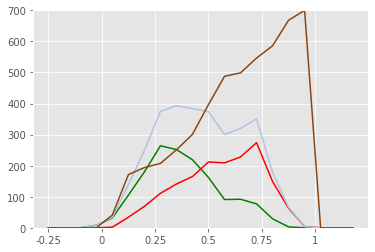

In [38]:
ca.plotPredictionScores(ca.gl_last_y_aa, ca.gl_last_preds_aa, ratio_color='saddlebrown', ymax = 700)

[0, 0, 0, 0.0, 98.34710743801654, 129.62962962962962, 182.9787234042553, 189.1891891891892, 235.8974358974359, 350.0, 341.6267942583732, 379.16666666666663, 485.9504132231405, 520.183486238532, 531.4814814814815, 606.6666666666667, 700.0, 0, 0, 0]


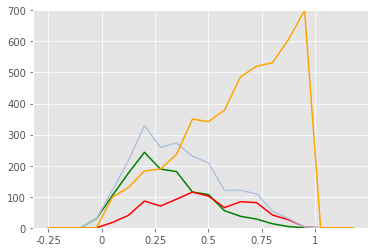

In [39]:
ca.plotPredictionScores(ca.gl_last_y_cau, ca.gl_last_preds_cau, ratio_color='orange', ymax = 700)

# More experiments

The code affords much more probing and experimentation.<br>Train a logistic regression model using a feature set that includes race as a feature.

In [40]:
ca.runTrainTestFull(ddict_list2, ca.gl_features_race)

feature_list: ['race', 'age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
AUC: 0.7470159581151702
choosing score_threshold: 0.523 for optimal mcc score: 0.3769308974434568
count: 6172
[2661, 702]
[1193, 1616]
FPR: 0.2087421944692239
FNR: 0.4247063011747953
TNR: 0.7912578055307761
TPR = recall: 0.5752936988252046
PPV = precision: 0.6971527178602244
f1: 0.6303881412131851
mcc: 0.3769308974434568
recidivism ratio: 0.4551198963058976


Compare the discrepancy of False Positive and False Negative errors of this model between African-American and Caucasian populations with the model (above) that excludes race as a feature.<br>The optimal MCC threshold is .523

In [41]:
ca.runRaceComparisonForModel(ddict_list2, ca.gl_last_model, .523, ca.gl_features_race)

feature_list: ['race', 'age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']

Caucasian
AUC: 0.7263960827440561
count: 2103
[1071, 210]
[452, 370]
FPR: 0.16393442622950818
FNR: 0.5498783454987834
TNR: 0.8360655737704918
TPR = recall: 0.45012165450121655
PPV = precision: 0.6379310344827587
f1: 0.5278174037089872
mcc: 0.3124616873558286
recidivism ratio: 0.3908701854493581

African-American
AUC: 0.7436425193080526
count: 3175
[1083, 431]
[541, 1120]
FPR: 0.2846763540290621
FNR: 0.3257074051776038
TNR: 0.7153236459709379
TPR = recall: 0.6742925948223961
PPV = precision: 0.7221147646679562
f1: 0.6973848069738481
mcc: 0.38930133606195233
recidivism ratio: 0.5231496062992126


Test the race-sensitive model with race='African-American' and race='Caucasian' feature values reversed for each other.

In [42]:
ca.runRaceComparisonForModel_InvertRace(ddict_list2, ca.gl_last_model, .523, ca.gl_features_race)

feature_list: ['race', 'age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']

Caucasian
AUC: 0.7263951330602059
count: 2103
[1044, 237]
[431, 391]
FPR: 0.18501170960187355
FNR: 0.524330900243309
TNR: 0.8149882903981265
TPR = recall: 0.47566909975669097
PPV = precision: 0.6226114649681529
f1: 0.5393103448275862
mcc: 0.3098960290251951
recidivism ratio: 0.3908701854493581

African-American
AUC: 0.7436425193080526
count: 3175
[1127, 387]
[586, 1075]
FPR: 0.25561426684280053
FNR: 0.3527995183624323
TNR: 0.7443857331571995
TPR = recall: 0.6472004816375677
PPV = precision: 0.7352941176470589
f1: 0.6884406019852705
mcc: 0.3923943818820216
recidivism ratio: 0.5231496062992126


The discrepacy is reduced somewhat, which reflects the fact that race is of some predictive value in predicting recidivism.  But the direction of significant discrepancy in False Positive and False Negative errors between the two populations remains the same.  Even if race is included as a feature, the prediction distributions and confusion matrices are dominated by the race-neutral features, age, priors counts, and charge description.

Use a Gradient Boosting Regressor model instead of a logistic regression model.

In [43]:
ca.setModelType('gbr')

setting model type to: gbr


Because a GBR has many more parameters than a logistic regression or linear model, it is subject to overfitting the training data. It is most appropriate to use K-Fold cross validation, meaning we divide the data set into random slices.  Train on 4/5 of the data, and test on the other 1/5 slices.

In [44]:
ca.runTrainTestKFold(ddict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
AUC: 0.7353965160410503
choosing score_threshold: 0.42000000000000004 for optimal mcc score: 0.36199678666785023
count: 6172
[2184, 1179]
[806, 2003]
FPR: 0.35057983942908116
FNR: 0.28693485226059096
TNR: 0.6494201605709188
TPR = recall: 0.713065147739409
PPV = precision: 0.6294783155248271
f1: 0.6686696711734268
mcc: 0.36119691352758715
recidivism ratio: 0.4551198963058976


AUC is .73, compared to .75 when training a GBR model on the full data set:

In [45]:
ca.runTrainTestFull(ddict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
AUC: 0.7508867413236824
choosing score_threshold: 0.41300000000000003 for optimal mcc score: 0.3880973124705922
count: 6172
[2208, 1155]
[749, 2060]
FPR: 0.3434433541480821
FNR: 0.2666429334282663
TNR: 0.656556645851918
TPR = recall: 0.7333570665717337
PPV = precision: 0.640746500777605
f1: 0.6839309428950863
mcc: 0.38867952294900193
recidivism ratio: 0.4551198963058976


These are pretty close, which means the overfitting is not too too bad with the default parameters I chose by experimentation.

# Produce .json files for the Confusion Matrix Dashboard

This is an example of training a GBR model on Broward Recidivism data and gathering predictions, then writing the predictions and outcomes to a .json file for viewing in the Confusion Matrix Dashboard. 

In [46]:
ca.setModelType('gbr')

setting model type to: gbr


In [47]:
ca.gl_score_plot_range_min = 0.0

In [48]:
ca.gl_score_plot_range_max = 1.0

In [49]:
gl_recidivism_tag = 'two_year_recid'

For a GBR model, better use KFold cross validation.  Thsi leaves results in global variables, ca.gl_last_y, etc.

In [50]:
ca.runTrainTestKFold(ddict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
AUC: 0.7340892824950792
choosing score_threshold: 0.44300000000000006 for optimal mcc score: 0.3668585919872056
count: 6172
[2314, 1049]
[899, 1910]
FPR: 0.311923877490336
FNR: 0.3200427198291207
TNR: 0.688076122509664
TPR = recall: 0.6799572801708793
PPV = precision: 0.6454883406556269
f1: 0.6622746185852982
mcc: 0.3668585919872056
recidivism ratio: 0.4551198963058976


Let's write to a local .json file. 

In [51]:
ca.writeModelPredictionsToJSONFile(ca.gl_last_y, ca.gl_last_preds, ddict_list2, 'broward-gbr-test.json', 'broward-gbr-test', 'Broward Recidivism - Gradient Boosting Regressor test', 'no notes yet', 10, [('race', '==', 'African-American'), ('race', '==', 'Caucasian')], True)

filepath broward-gbr-test.json already exists, overwriting with a new file


To test this in the Confusion Matrix Dashboard, go to Data Source - Import File Data

# Violent Recidivism

Test violent recidivism instead of general recidivism.

In [65]:
ca.setRecidType('v_recid', ddict_list)

setting gl_charge_index_desc_map


Load the violent recidivism data set, 'compas-scores-two-years-violent.csv'

In [69]:
vdict_list = ca.loadDataReturnDDictList('violent')

loading data from: data\compas-scores-two-years-violent.csv


In [70]:
vdict_list2 = ca.applyFilters(vdict_list, 'violent')

Adjust features for violent recidivism.

In [71]:
ca.computeChargeDescMap(vdict_list)

setting gl_charge_index_desc_map


In [72]:
ca.computeAgeFeatureMap()

In [73]:
vdict_list2_aa = ca.filterDdict(vdict_list2, [('race', '==', 'African-American')])

In [74]:
vdict_list2_cau = ca.filterDdict(vdict_list2, [('race', '==', 'Caucasian')])

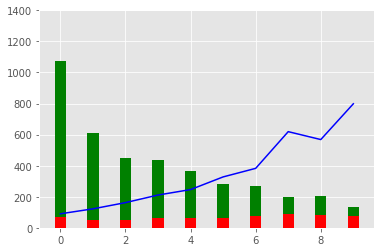

In [75]:
ca.plotRecidByDecile(vdict_list2, 'blue', 'both', 1400)

In [76]:
vroc = ca.buildROCCurve(vdict_list2)

AUC:0.7312071424105158


COMPAS gets an AUC on violent recidivism of .72, which is better than reported by ProPublica.

AUC: 0.7312071424105158


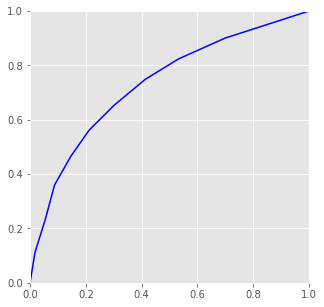

In [77]:
ca.plotROC(vroc)

Print confusion matrices for African-American and Caucasian data records.

In [78]:
ca.buildConfusionMatrix(ddict_list_aa)

count: 3696
[1853, 1348]
[187, 308]
FPR: 0.4211184004998438
FNR: 0.37777777777777777
TNR: 0.5788815995001562
TPR = recall: 0.6222222222222222
PPV = precision: 0.1859903381642512
f1: 0.28637842863784285
recidivism ratio: 0.13392857142857142


[[1853, 1348], [187, 308]]

In [79]:
ca.buildConfusionMatrix(ddict_list_cau)

count: 2454
[1772, 460]
[139, 83]
FPR: 0.2060931899641577
FNR: 0.6261261261261262
TNR: 0.7939068100358423
TPR = recall: 0.3738738738738739
PPV = precision: 0.15285451197053407
f1: 0.2169934640522876
recidivism ratio: 0.09046454767726161


[[1772, 460], [139, 83]]

As with all recidivism, the False Positive and False Negative rates are different for AA and Cau populations.

Build our own model for violent recidivism that omits race and sex features with certainty.<br>Go back to a logistic regression model.

In [80]:
ca.setModelType('logr')

setting model type to: logr


In [81]:
ca.runTrainTestKFold(vdict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
AUC: 0.7408379418630487
choosing score_threshold: 0.21800000000000003 for optimal mcc score: 0.30054439726401416
count: 4020
[2635, 693]
[304, 388]
FPR: 0.20823317307692307
FNR: 0.4393063583815029
TNR: 0.7917668269230769
TPR = recall: 0.5606936416184971
PPV = precision: 0.35892691951896394
f1: 0.4376762549351382
mcc: 0.30008375131117376
recidivism ratio: 0.17213930348258707


The overall violent recidivism ratio is 0.17 in this data set.<br>Compare 5-fold cross-validation with a full data logistic regression model, to check for overfitting.

In [82]:
ca.runTrainTestFull(vdict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
AUC: 0.7637982332425458
choosing score_threshold: 0.291 for optimal mcc score: 0.3481577605674707
count: 4020
[2957, 371]
[374, 318]
FPR: 0.11147836538461539
FNR: 0.5404624277456648
TNR: 0.8885216346153846
TPR = recall: 0.4595375722543353
PPV = precision: 0.46153846153846156
f1: 0.4605358435916003
mcc: 0.3486590198647586
recidivism ratio: 0.17213930348258707


Overfitting is possible because there are more charge descriptions with only a handful of incidents, which even a logistic regression model can overfit with the 73 one-hot c_charge_desc features. So, it is more correct to use the 5-fold model to predict violent recidivism.

In [83]:
ca.runTrainTestKFold(vdict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
AUC: 0.7377805934582016
choosing score_threshold: 0.271 for optimal mcc score: 0.3099343578606931
count: 4020
[2895, 433]
[381, 311]
FPR: 0.13010817307692307
FNR: 0.5505780346820809
TNR: 0.8698918269230769
TPR = recall: 0.44942196531791906
PPV = precision: 0.41801075268817206
f1: 0.4331476323119777
mcc: 0.31038731874222314
recidivism ratio: 0.17213930348258707


AUC is .72, which is "not bad".

There is a lot of overlap in the recid and norecid distributions.  But the bulk of the no recidivism records get lower prediction scores.

[0, 0, 0, 87.46355685131195, 189.3877551020408, 299.7762863534675, 440.74844074844077, 616.5413533834586, 880.0, 909.090909090909, 1097.5609756097563, 956.5217391304349, 1071.4285714285713, 1000.0, 1250.0, 2000.0, 0, 0, 0, 0]


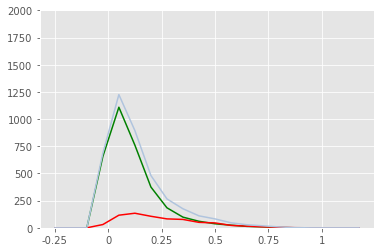

In [84]:
ca.plotPredictionScores(ca.gl_last_y, ca.gl_last_preds, ratio_color=None, ymax = 2000)

The ROC curve looks a bit flatter as well.  But at least it is better than being on the diagonal with an AUC of 0.5.

AUC: 0.7377805934582016


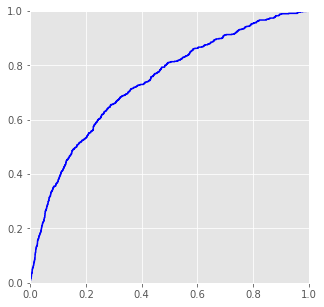

In [85]:
ca.plotROC(ca.gl_last_roc)

Print confusion matrices for the logistic regression model for violent recidivism, broken out by African-American and Caucasian subpopulations.<br>
Choose the threshold of .279 because that's what was chosen by mcc for the model trained on all data.<br>
(Actually, the threshold could be slightly higher or lower when run repeatedly due to k-fold randomization.)

In [86]:
ca.runRaceComparisonForModel(vdict_list2, ca.gl_last_model, .279)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']

Caucasian
AUC: 0.7245225485475835
count: 1459
[1161, 112]
[116, 70]
FPR: 0.08798114689709348
FNR: 0.6236559139784946
TNR: 0.9120188531029065
TPR = recall: 0.3763440860215054
PPV = precision: 0.38461538461538464
f1: 0.3804347826086956
mcc: 0.29105762063273183
recidivism ratio: 0.12748457847840988

African-American
AUC: 0.7526589384384952
count: 1918
[1255, 237]
[208, 218]
FPR: 0.15884718498659517
FNR: 0.48826291079812206
TNR: 0.8411528150134048
TPR = recall: 0.5117370892018779
PPV = precision: 0.47912087912087914
f1: 0.4948921679909194
mcc: 0.3448264599164344
recidivism ratio: 0.22210636079249219


Plot violent recidivism prediction scores for a logistic regression model for African-American and Caucasian subsets of the violent recidivism data.

[0, 0, 0, 20.833333333333332, 52.63157894736842, 75.63025210084034, 128.86597938144328, 166.66666666666666, 214.28571428571428, 256.25, 360.0, 320.0, 239.13043478260872, 409.0909090909091, 500.0, 500.0, 0, 0, 0, 0]


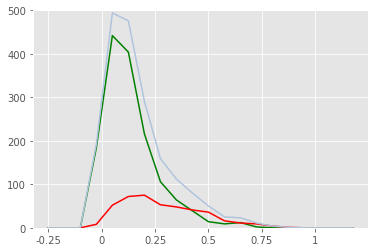

In [87]:
ca.plotPredictionScores(ca.gl_last_y_aa, ca.gl_last_preds_aa, None, ymax = 500)

[0, 0, 0, 19.943019943019944, 44.265593561368206, 64.56953642384106, 77.8688524590164, 141.66666666666666, 153.84615384615387, 216.66666666666669, 236.8421052631579, 285.7142857142857, 166.66666666666666, 400.0, 500.0, 0, 0, 0, 0, 0]


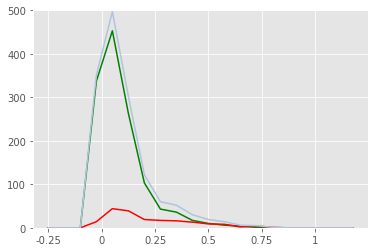

In [88]:
ca.plotPredictionScores(ca.gl_last_y_cau, ca.gl_last_preds_cau, None, ymax = 500)

Try a Gradient Boosting Regressor model to predict violent recidivism.

In [89]:
ca.setModelType('gbr')

setting model type to: gbr


A 5-fold CV model does maybe a tad better, with AUC=.74:

In [90]:
ca.runTrainTestKFold(vdict_list2)

feature_list: ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc']
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
AUC: 0.7435131759948823
choosing score_threshold: 0.23000000000000004 for optimal mcc score: 0.3116437587692723
count: 4020
[2719, 609]
[320, 372]
FPR: 0.18299278846153846
FNR: 0.4624277456647399
TNR: 0.8170072115384616
TPR = recall: 0.5375722543352601
PPV = precision: 0.37920489296636084
f1: 0.4447101016138673
mcc: 0.3116437587692723
recidivism ratio: 0.17213930348258707


With cross-validation, we don't get out a single model to compare the distributions and confusion matrices between African-American and Caucasian defendants, so we cannot apply runRaceComparisonForModel() directly. It would be possible to write a function to do so by running the evaluations of the two racial populations on the test slices under each of the K model training splits.  This exercise is left to the reader.
